<a href="https://colab.research.google.com/github/SridharaniKatipally/Learnflow-DataScience/blob/main/Fraud_Detection_in_E_commerce_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install pandas numpy scikit-learn matplotlib seaborn


In [6]:
from google.colab import files
files.upload()  # Choose the kaggle.json file from your local system


Saving archive (1).zip to archive (1).zip


In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d mlg-ulb/creditcardfraud


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 96% 63.0M/66.0M [00:00<00:00, 127MB/s] 
100% 66.0M/66.0M [00:00<00:00, 114MB/s]


In [8]:
!unzip creditcardfraud.zip


Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Display the first few rows of the dataset
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
# Check for missing values
df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler

# Scaling 'Amount' feature
df['amount_scaled'] = StandardScaler().fit_transform(df[['Amount']])
df.drop('Amount', axis=1, inplace=True)

# Scaling 'Time' feature
df['time_scaled'] = StandardScaler().fit_transform(df[['Time']])
df.drop('Time', axis=1, inplace=True)


In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[56855     9]
 [   41    57]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

# Evaluate the best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ............................C=0.1, solver=liblinear; total time=   3.8s
[CV] END ............................C=0.1, solver=liblinear; total time=   2.4s
[CV] END ............................C=0.1, solver=liblinear; total time=   2.4s
[CV] END ............................C=0.1, solver=liblinear; total time=   2.4s
[CV] END ............................C=0.1, solver=liblinear; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................................C=0.1, solver=saga; total time= 3.0min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................................C=0.1, solver=saga; total time= 2.8min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................................C=0.1, solver=saga; total time= 2.8min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................................C=0.1, solver=saga; total time= 2.9min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................................C=0.1, solver=saga; total time= 2.9min
[CV] END ..............................C=1, solver=liblinear; total time=   3.7s
[CV] END ..............................C=1, solver=liblinear; total time=   3.1s
[CV] END ..............................C=1, solver=liblinear; total time=   3.0s
[CV] END ..............................C=1, solver=liblinear; total time=   3.4s
[CV] END ..............................C=1, solver=liblinear; total time=   3.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................................C=1, solver=saga; total time= 2.9min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................................C=1, solver=saga; total time= 2.8min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................................C=1, solver=saga; total time= 2.9min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................................C=1, solver=saga; total time= 2.9min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................................C=1, solver=saga; total time= 2.9min
[CV] END .............................C=10, solver=liblinear; total time=   3.7s
[CV] END .............................C=10, solver=liblinear; total time=   3.7s
[CV] END .............................C=10, solver=liblinear; total time=   3.1s
[CV] END .............................C=10, solver=liblinear; total time=   3.3s
[CV] END .............................C=10, solver=liblinear; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=10, solver=saga; total time= 2.9min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=10, solver=saga; total time= 2.9min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=10, solver=saga; total time= 2.9min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=10, solver=saga; total time= 2.9min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=10, solver=saga; total time= 2.9min
[CV] END ............................C=100, solver=liblinear; total time=   3.3s
[CV] END ............................C=100, solver=liblinear; total time=   3.3s
[CV] END ............................C=100, solver=liblinear; total time=   3.2s
[CV] END ............................C=100, solver=liblinear; total time=   4.1s
[CV] END ............................C=100, solver=liblinear; total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................................C=100, solver=saga; total time= 2.9min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................................C=100, solver=saga; total time= 2.9min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................................C=100, solver=saga; total time= 2.9min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................................C=100, solver=saga; total time= 2.9min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................................C=100, solver=saga; total time= 2.9min
[[56855     9]
 [   41    57]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [19]:
import joblib

# Ensure best_model is defined before this step
joblib.dump(best_model, 'fraud_detection_model.pkl')


['fraud_detection_model.pkl']

In [20]:
# Load the model
loaded_model = joblib.load('fraud_detection_model.pkl')

# Make predictions with the loaded model
new_predictions = loaded_model.predict(X_test)

# Evaluate the loaded model
print(confusion_matrix(y_test, new_predictions))
print(classification_report(y_test, new_predictions))


[[56855     9]
 [   41    57]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



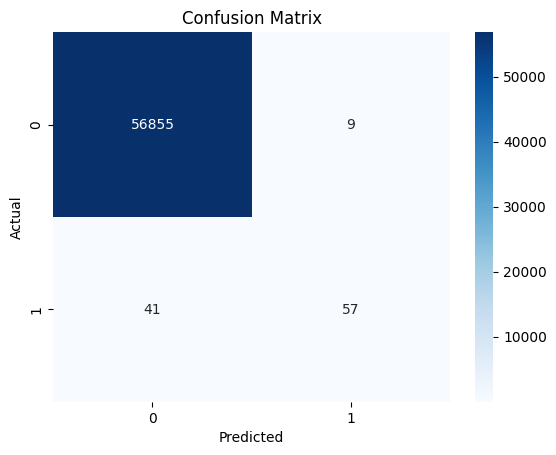

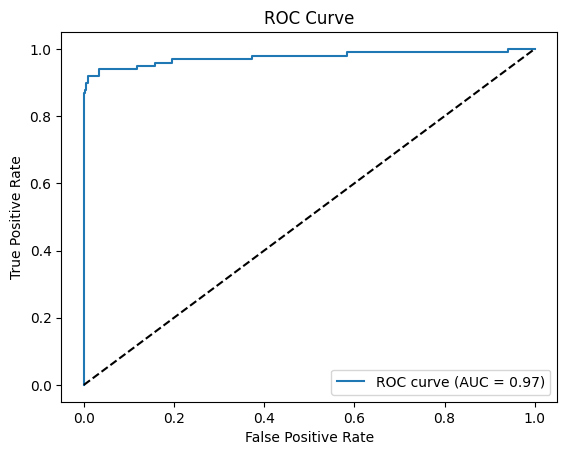

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, new_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = loaded_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()
